<a href="https://colab.research.google.com/github/parwinderau/machinelearning/blob/main/wine-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the number of distressed O-rings for space shuttles

Please keep in mind that the number of data samples is very low for this example.

In [40]:
# Case scenario:
# On January 28, 1986, a routine launch was anticipated for the Challenger space shuttle. 
# Seventy-three seconds into the flight, disaster happened: the shuttle broke apart, killing all 
# seven crew members on board. An investigation into the cause of the disaster focused on a critical # seal called an O-ring, and it is believed that damage to these O-rings during a shuttle launch may # be related to the ambient temperature during the launch. The table below summarizes observational # data on O-rings for 23 shuttle missions, where the mission order is based on the temperature at
# the time of the launch.
#
# The goal is to predict the number of O-rings that will experience thermal distress for a given 
# flight when the launch temperature is below freezing.

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# function definition to save the figure
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    file = fig_id + "." + fig_extension
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(file, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [77]:
# import pandas to import the dataset
import pandas as pd
# import the dataset

def load_o_ring_data():
    # a way to save the name of the file as a string
    csv_file =  'winequality-red.csv'
    # The separator in this dataset is given by a space instad of ','
    data = pd.read_csv(csv_file, sep = ';'); df = pd.DataFrame(data)
    return df

In [78]:
# call of function to load the dataset and display it
o_ring = load_o_ring_data(); o_ring.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [79]:
# we can also observe some information about the data
o_ring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [80]:
# we count the number of time the values in O_rings_thermal_distress are repeated
o_ring["pH"].value_counts()

3.30    57
3.36    56
3.26    53
3.38    48
3.39    48
        ..
3.75     1
2.74     1
3.70     1
3.85     1
2.90     1
Name: pH, Length: 89, dtype: int64

In [81]:
# This is in case you want to show also some statistics of the data 
o_ring.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Saving figure histograms


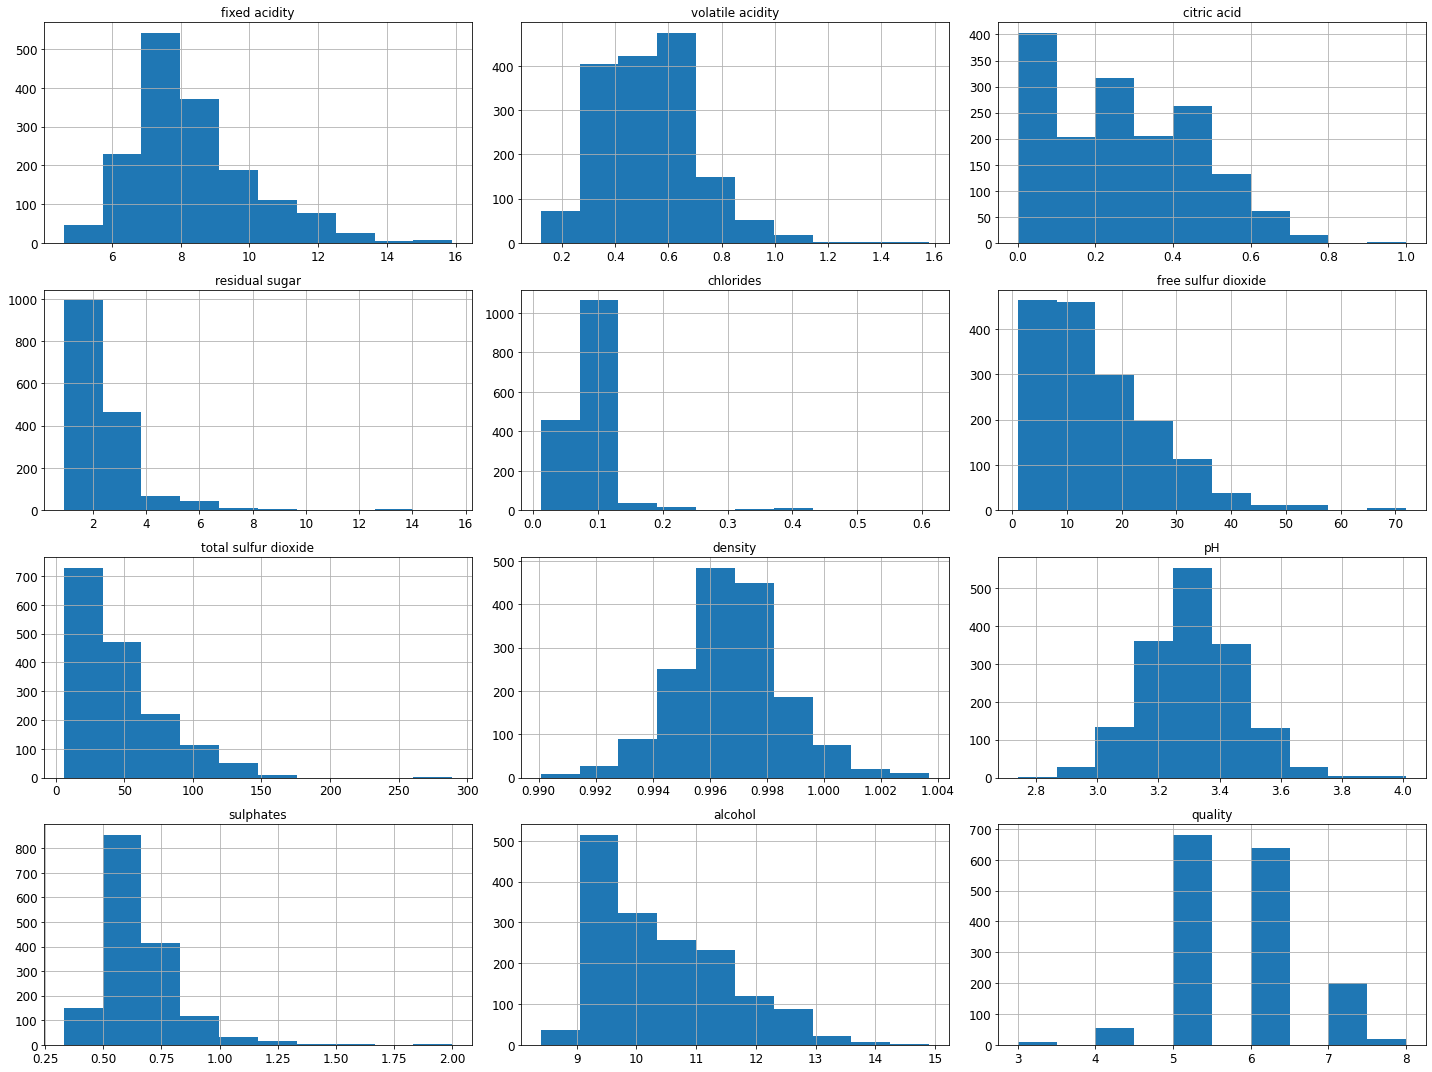

In [82]:
# We want to dsiplay the values of the dataset
# Display the plots in line
%matplotlib inline
import matplotlib.pyplot as plt
o_ring.hist(bins=10, figsize=(20,15))
save_fig('histograms')
plt.show()

In [83]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [84]:
from sklearn.model_selection import train_test_split
# split the data into training and test set.
train_set, test_set = train_test_split(o_ring, test_size=0.2, random_state=42)

In [85]:
test_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6,6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5,5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9,6
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8,5
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6,6


In [86]:
# To "filter" the dataset and create the one needed for the training
# drop the labels for training set to create the input training set
o_ring = train_set.drop("quality", axis=1) 
#o_ring = o_ring.drop("Nr_of_Flight", axis=1)
# The label for the training is characterised by the column with the
# "O_rings_thermal_distress"
o_ring_labels = train_set["quality"].copy()

In [87]:
train_set.head()
#o_ring.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6,6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8,6
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4,5
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9,5


In [88]:
o_ring.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9


In [89]:
o_ring_labels.head()

493    6
354    6
342    6
834    5
705    5
Name: quality, dtype: int64

In [90]:
# To prepare the data it is possible to use a Pipeline
# I leave to you to look into the information about Pipelines and Transformers.
# Here some suggestions: https://www.databricks.com/glossary/what-are-ml-pipelines
# http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])
print(num_pipeline)

Pipeline(steps=[('std_scaler', StandardScaler())])


In [91]:
from sklearn.compose import ColumnTransformer

In [93]:

num_attribs = list(o_ring)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])

o_ring_prepared = full_pipeline.fit_transform(o_ring)

In [94]:
o_ring_prepared

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

In [95]:
# Here diverse types of regressive models are used: Support Vector Machines, Random Forests 
# and Linear Regressors

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

#reg = RandomForestRegressor(n_estimators=10, random_state=42)
reg = SVR(kernel="linear")
#reg = LinearRegression()

# The fit function trains the regressor (the model)
reg.fit(o_ring_prepared, o_ring_labels)

SVR(kernel='linear')

In [96]:

some_data = o_ring.iloc[:5]
some_labels = o_ring_labels.iloc[:5]
# Part of the dataset (not used for training) is used to build for the prediction
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", reg.predict(some_data_prepared))

Predictions: [5.72543938 6.07408447 5.65400327 5.02055677 4.90153168]


In [97]:

print("Labels:", list(some_labels))

Labels: [6, 6, 6, 5, 5]


In [98]:
from sklearn.metrics import mean_squared_error
# some metrics used to evaluate the error in the prediction
o_ring_predictions = reg.predict(o_ring_prepared)
mse = mean_squared_error(o_ring_labels, o_ring_predictions)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.6566986702591648


In [99]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(o_ring_labels, o_ring_predictions)
print("MAE:", mae)

MAE: 0.4932848511922257


# Cross validation on the training set - a better way of validation

In [100]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
from sklearn.model_selection import cross_val_score
# cross_val_score is a way to use the cross-validation in sklearn.
# cross validation https://scikit-learn.org/stable/modules/cross_validation.html
cross_validation_scores = cross_val_score(reg, o_ring_prepared, o_ring_labels,
                                          scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-cross_validation_scores)
display_scores(rmse_scores)

Scores: [0.63873129 0.72717675 0.68801801 0.69978646 0.69927149 0.68885734
 0.66080038 0.67509594 0.48820772 0.64468623]
Mean: 0.6610631620952128
Standard deviation: 0.06298600343889242


## Examination of the role of the temperature

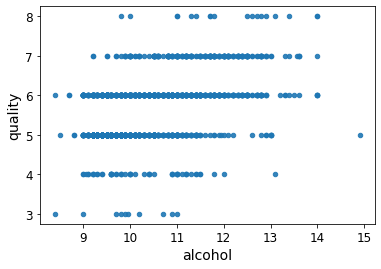

In [103]:
# plot of the results 
pd.concat([train_set, test_set]).plot(kind="scatter", x="alcohol", y="quality", alpha=0.9)